# Importing The Modules

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Collecting And Processing

In [2]:
#importing the data from csv file to pandas data frame
car_data = pd.read_csv('car_data.csv')

In [3]:
#inspecting first five rows of our dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#inspecting last five rows of our dataset
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
# for checking the number of rows and columns in our dataset
print(f"Number of rows and colums respectively = {car_data.shape}")

Number of rows and colums respectively = (301, 9)


<AxesSubplot:>

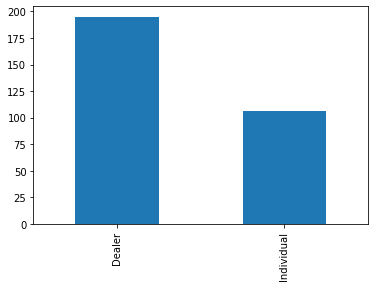

In [6]:
car_data["Seller_Type"].value_counts().plot.bar()

<AxesSubplot:>

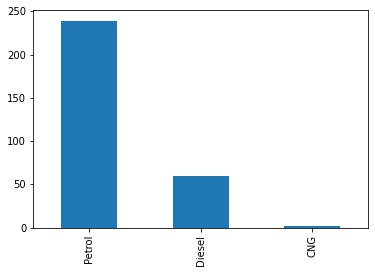

In [7]:
car_data["Fuel_Type"].value_counts().plot.bar()

<AxesSubplot:>

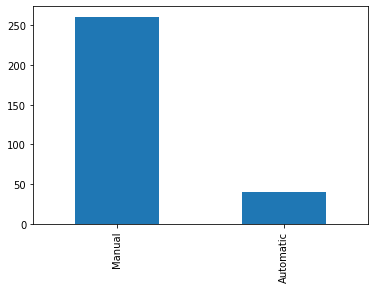

In [8]:
car_data["Transmission"].value_counts().plot.bar()

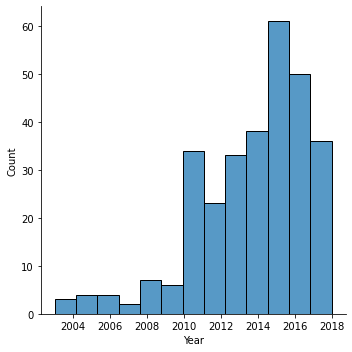

In [9]:
sns.displot(car_data["Year"])

<AxesSubplot:>

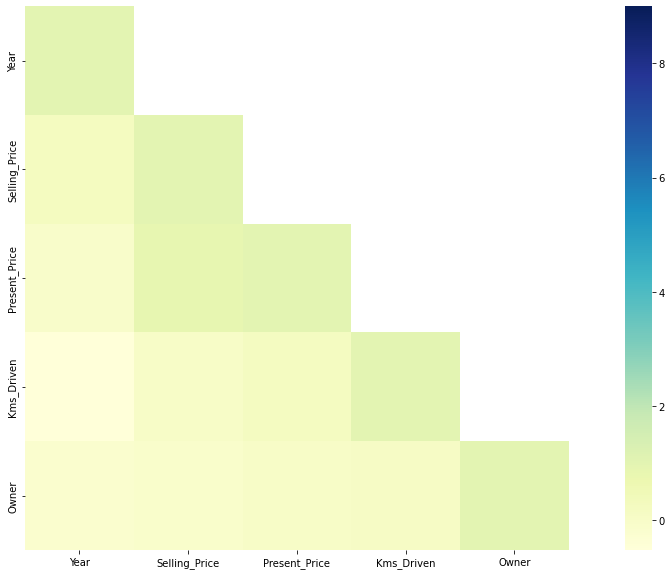

In [10]:
corr = car_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=9, square=True, cmap="YlGnBu")

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

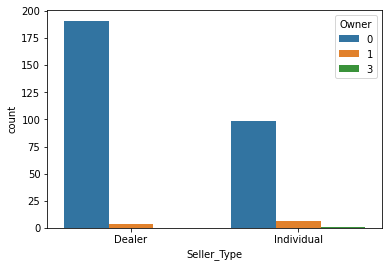

In [11]:
sns.countplot(x = "Seller_Type",hue= "Owner",data= car_data)

In [12]:
# getting some information about our dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
#checking the missing value in the dataset 
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
#checking the distribution of cars in categorical variables
print(f"\nThe Number of cars divided into Fuel type =\n{car_data.Fuel_Type.value_counts()}")
print(f"\nThe Number of cars divided into Seller type =\n{car_data.Seller_Type.value_counts()}")
print(f"\nThe Number of cars divided into Transmission =\n{car_data.Transmission.value_counts()}")


The Number of cars divided into Fuel type =
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

The Number of cars divided into Seller type =
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

The Number of cars divided into Transmission =
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding The Categorical Variables in Numerical 

In [15]:
# Encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol': 0,'Diesel': 1,'CNG': 2}},inplace = True)

# Encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer': 0,'Individual': 1}},inplace = True)

# Encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual': 0,'Automatic': 1}},inplace = True)

In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data and target

In [17]:
x = car_data.drop(['Car_Name','Selling_Price'],axis = 1) #drop column axis = 1
y = car_data['Selling_Price']

In [18]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


# Splitting training and test data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 2)

# Inputs for testing model

In [21]:
# import numpy as np

In [22]:
# from sklearn.preprocessing import StandardScaler
# input3 = StandardScaler().fit_transform(car_data)
# yu = np.array(input3)
# yu[0]

In [23]:
# np.set_printoptions(formatter = {'float_kind': '{:f}'.format})

In [24]:
# inputs = x.to_numpy()

In [25]:
# inputs[0]

# Model Training

## 1. linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#loading the linear regression model
LR_model = LinearRegression()

In [28]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [29]:
# predict our model of test set
test_pred = LR_model.predict(x_test)

In [30]:
from sklearn import metrics

In [31]:
error_score = metrics.r2_score(y_test,test_pred)
print(f"R squared error : {error_score}")

R squared error : 0.8401532365377684


## 2. Lasso Regression model

In [32]:
from sklearn.linear_model import Lasso

In [33]:
# loading our model 
lasso_model = Lasso()

In [34]:
lasso_model.fit(x_train,y_train)

Lasso()

In [35]:
# predict our lasso model
lasso_test_pred = lasso_model.predict(x_test)

In [36]:
lasso_score = metrics.r2_score(y_test,lasso_test_pred)
lasso_score

0.8497457570738539

## 3. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
tree_model = DecisionTreeRegressor()

In [39]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
# predict our tree model
tree_test_pred = tree_model.predict(x_test)

In [41]:
tree_score = metrics.r2_score(y_test,tree_test_pred)
tree_score

0.9283889915264087

# Making joblib file 

In [42]:
from joblib import dump #Joblib is a set of tools to provide lightweight pipelining in Python

In [43]:
dump(tree_model,"model.joblib")

['Prasuk.joblib']